Using the adult income dataset to understand if people with more years of education will have higher salaries, and is there a difference between mens and women?
I would like to understand if there is a correlation between some of the parameters? 
Then I would like to understand if marital status affects the income?
A presentation for executives:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
#Separating income:
df_low = df.loc[df['income'] == '<=50K']
df_high = df.loc[df['income'] == '>50K']
print("Low income:", df_low.shape)
print("High income:", df_high.shape)

Low income: (37155, 15)
High income: (11687, 15)


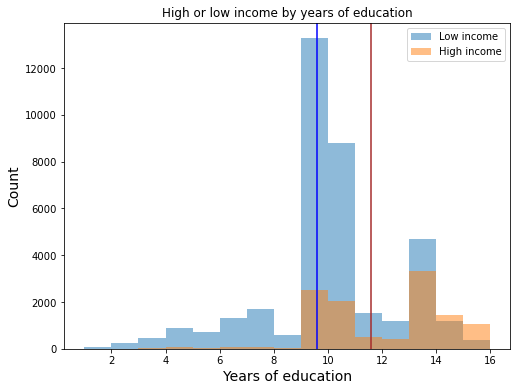

In [4]:
plt.figure(figsize=(8,6))
plt.hist(df_low['educational-num'], bins=15, alpha=0.5, label="Low income")
plt.hist(df_high['educational-num'], bins=15, alpha=0.5, label="High income")
plt.axvline(x=df_low['educational-num'].mean(),color='blue')
plt.axvline(x=df_high['educational-num'].mean(),color='brown')
plt.xlabel("Years of education", size=14)
plt.ylabel("Count", size=14)
plt.title("High or low income by years of education")
plt.legend(loc='upper right')

In [9]:
#Searating between men and women:
print(df_low['gender'].unique())
print(df_high['gender'].unique())

['Male' 'Female']
['Male' 'Female']


In [6]:
df_low_men = df_low.loc[df_low['gender'] == 'Male']
df_low_women = df_low.loc[df_low['gender'] == 'Female']
df_high_men = df_high.loc[df_high['gender'] == 'Male']
df_high_women = df_high.loc[df_high['gender'] == 'Female']

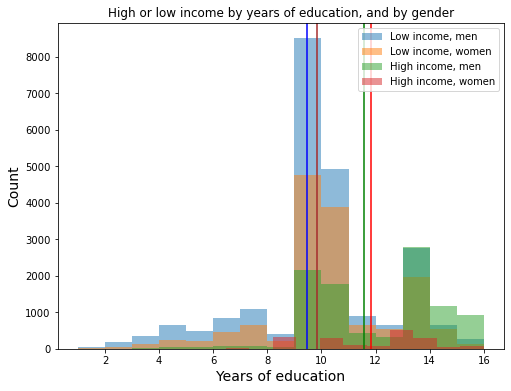

In [7]:
plt.figure(figsize=(8,6))
plt.hist(df_low_men['educational-num'], bins=15, alpha=0.5, label="Low income, men")
plt.hist(df_low_women['educational-num'], bins=15, alpha=0.5, label="Low income, women")
plt.hist(df_high_men['educational-num'], bins=15, alpha=0.5, label="High income, men")
plt.hist(df_high_women['educational-num'], bins=15, alpha=0.5, label="High income, women")
plt.axvline(x=df_low_men['educational-num'].mean(),color='blue')
plt.axvline(x=df_low_women['educational-num'].mean(),color='brown')
plt.axvline(x=df_high_men['educational-num'].mean(),color='green')
plt.axvline(x=df_high_women['educational-num'].mean(),color='red')
plt.xlabel("Years of education", size=14)
plt.ylabel("Count", size=14)
plt.title("High or low income by years of education, and by gender")
plt.legend(loc='upper right')

It looks like women earn a bit higher salaries than men.

Are older people have more years of education? and are more years of aducation are assosiated with higher income?

<AxesSubplot:xlabel='age', ylabel='educational-num'>

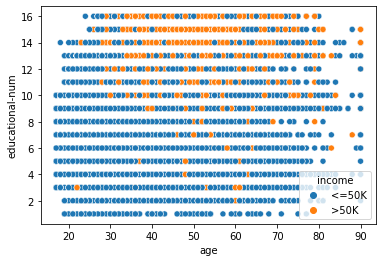

In [8]:
sns.scatterplot(data=df, x="age", y="educational-num", hue="income")

There is no connection between aga and number of years of education.
Higher age is a ssosiated with higher income.

Is there a correlation between age, education, capital gain/loss and the hours of work?

In [13]:
df_1 = df[['age', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']]

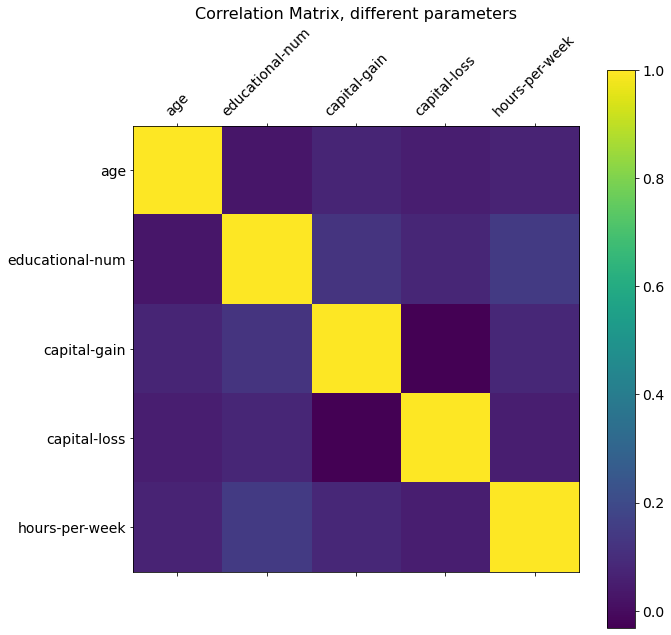

In [14]:
f = plt.figure(figsize=(10, 10))
plt.matshow(df_1.corr(), fignum=f.number)
plt.xticks(range(df_1.select_dtypes(['number']).shape[1]), df_1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df_1.select_dtypes(['number']).shape[1]), df_1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix, different parameters', fontsize=16);

Does marital status affects the income?
I will first check the distribution of marital status, then check how many of each type earn less or more than 50K.

In [34]:
Marital = df.groupby("marital-status")['income'].count()
Marital

marital-status
Divorced                  6633
Married-AF-spouse           37
Married-civ-spouse       22379
Married-spouse-absent      628
Never-married            16117
Separated                 1530
Widowed                   1518
Name: income, dtype: int64

<AxesSubplot:ylabel='income'>

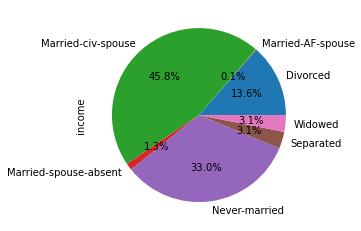

In [35]:
Marital.plot.pie(autopct="%.1f%%")

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

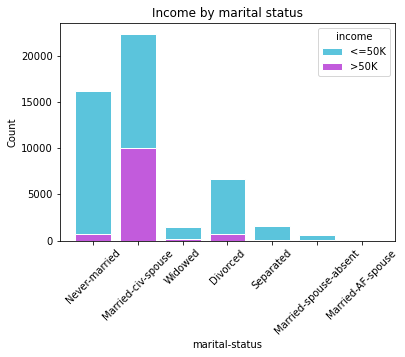

In [29]:
ax = sns.histplot(
    df,
    x='marital-status',
    hue='income',
    multiple='stack',
    palette=['#24b1d1', '#ae24d1'],
    edgecolor='white',
    shrink=0.8)
ax.set_title('Income by marital status')
ax.set_ylabel('Count')
plt.xticks(rotation=45)

It looks like most of the people that never married or divorced earn less then 50K.